In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL.Image as Image
import os
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [4]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos', origin = dataset_url, untar=True)
data_dir= pathlib.Path(data_dir)



In [5]:
path=r"C:\Users\dell\.keras\datasets\flower_photos\flower_photos"


In [6]:
data_dir=pathlib.Path(path)
data_dir

WindowsPath('C:/Users/dell/.keras/datasets/flower_photos/flower_photos')

In [7]:
for i in data_dir.iterdir():
    print(i)

C:\Users\dell\.keras\datasets\flower_photos\flower_photos\daisy
C:\Users\dell\.keras\datasets\flower_photos\flower_photos\dandelion
C:\Users\dell\.keras\datasets\flower_photos\flower_photos\LICENSE.txt
C:\Users\dell\.keras\datasets\flower_photos\flower_photos\roses
C:\Users\dell\.keras\datasets\flower_photos\flower_photos\sunflowers
C:\Users\dell\.keras\datasets\flower_photos\flower_photos\tulips


In [8]:
## preparing dataset
flower_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflowers" : list(data_dir.glob("sunflowers/*")),
    "tulips" : list(data_dir.glob("tulips/*"))
}

In [9]:
## label encoding
flowers_labels = {
    "roses"  : 0,
    "daisy" : 1,
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips" : 4
}

In [10]:
flower_dict["sunflowers"][0]


WindowsPath('C:/Users/dell/.keras/datasets/flower_photos/flower_photos/sunflowers/1008566138_6927679c8a.jpg')

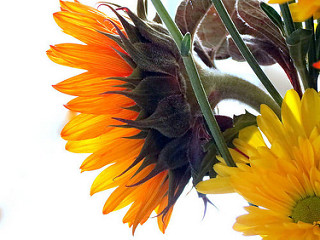

In [11]:
Image.open(flower_dict["sunflowers"][100])

In [12]:
no_of_classes = len(flower_dict.items())
no_of_classes

5

In [13]:
x , y = [], []
for key , value in flower_dict.items():
    for item in value:
        img = cv2.imread(str(item))
        reduced_img = cv2.resize(img,(224,224))
        x.append(reduced_img)
        y.append(flowers_labels[key])

In [14]:
x = np.array(x)
y = np.array(y)
x.shape , y.shape

((3670, 224, 224, 3), (3670,))

In [15]:
x_train ,x_test, y_train , y_test = train_test_split(x,
                                                     y,
                                                     test_size=0.2,
                                                     random_state=0)

In [16]:
## normalise
x_train_scaled = x_train/255
x_test_scaled = x_test/255

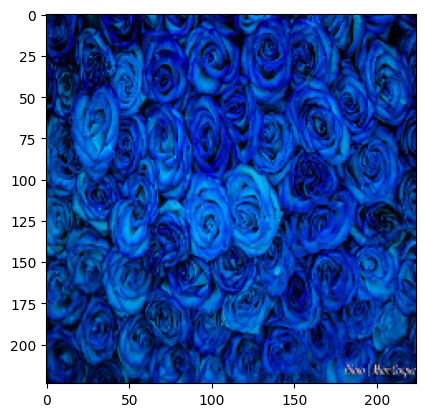

In [17]:
plt.imshow(x_train_scaled[200])
plt.show()

In [18]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

In [19]:
## model define
model = Sequential()
model.add(layers.Conv2D(32, (3, 3),
                        activation="relu",
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(5, activation="softmax"))
model.compile(optimizer= "adam",
              loss = "categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,132,293 (42.47 MB)

 Trainable params: 11,132,293 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
x_train_small = x_train_scaled[:500]
y_train_small = y_train_cat[:500]
x_train_small
# history = model.fit(
#     x_train_small,
#     y_train_small,
#     epochs=5,
#     batch_size=32
# )

array([[[[0.0627451 , 0.1254902 , 0.18823529],
         [0.05882353, 0.12156863, 0.18431373],
         [0.05490196, 0.11764706, 0.17254902],
         ...,
         [0.02352941, 0.02352941, 0.07843137],
         [0.02352941, 0.03137255, 0.07058824],
         [0.02352941, 0.03137255, 0.0745098 ]],

        [[0.05882353, 0.12156863, 0.18431373],
         [0.05098039, 0.11372549, 0.17647059],
         [0.04705882, 0.10980392, 0.17254902],
         ...,
         [0.00392157, 0.01568627, 0.07058824],
         [0.00392157, 0.01176471, 0.05490196],
         [0.01176471, 0.01960784, 0.0627451 ]],

        [[0.05490196, 0.12156863, 0.18039216],
         [0.04705882, 0.11372549, 0.17647059],
         [0.04313725, 0.10588235, 0.17254902],
         ...,
         [0.        , 0.01176471, 0.06666667],
         [0.        , 0.00784314, 0.0627451 ],
         [0.01176471, 0.01960784, 0.0627451 ]],

        ...,

        [[0.0745098 , 0.15294118, 0.19607843],
         [0.07058824, 0.14509804, 0.19607843]

In [21]:
# train_loss, train_acc = model.evaluate(x_train_scaled, y_train_cat)
# print("Train accuracy:", train_acc)